In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
dat = pd.read_csv("/content/PS-1-ChurnData-20240317T052202Z-001.zip")

In [ ]:
dat.sample()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
4091,6302-JGYRJ,Male,0,No,Yes,31,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,79.45,2587.7,Yes


In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
dat.drop('cID' , axis = 'columns' , inplace = True) #as cid not really imp

In [ ]:
dat['gender'] = dat['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
dat['Partner'] = dat['Partner'].map({'No': 0 , 'Yes': 1})

In [ ]:
dat['PhoneService'] = dat['PhoneService'].map({'No': 0, 'Yes': 1})
dat['Dependents'] = dat['Dependents'].map({'No': 0, 'Yes': 1})

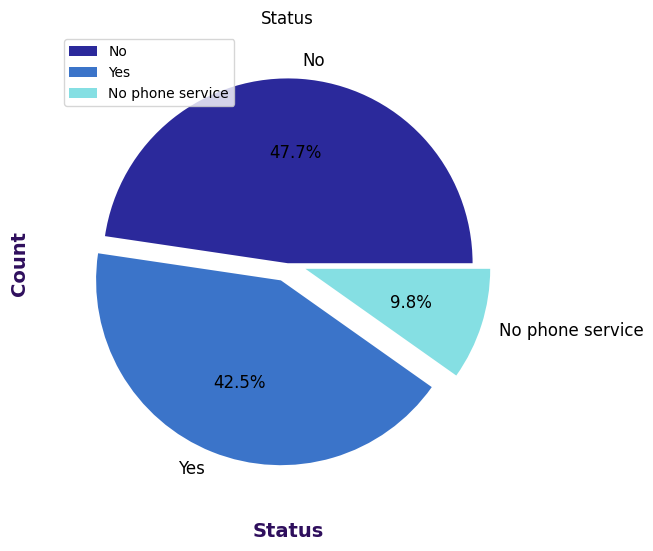

In [ ]:
colors = ["#2B299B" , "#3B74C9" , "#85DFE3"]

plt.figure(figsize = (20, 6))

counts = dat["MultipleLines"].value_counts()
explode = (0, 0.1  , 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [ ]:
mapping_dict = {'No phone service': 0, 'No': 0, 'Yes': 1}

dat['MultipleLines'] = dat['MultipleLines'].map(mapping_dict)

In [ ]:
dat['PhoneService'] = dat['PhoneService'].map({'No': 0, 'Yes': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dat.InternetService = le.fit_transform(dat.InternetService)

dat.Contract = le.fit_transform(dat.Contract)

dat.Method_Payment = le.fit_transform(dat.Method_Payment)

In [ ]:
dat.replace('No internet service','No',inplace=True)
dat.replace('No phone service','No',inplace=True)

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','TV_Streaming','Movie_Streaming','PaperlessBilling','Churn']
for col in yes_no_columns:
    dat[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
pd.to_numeric(dat.TotalCharges,errors='coerce').isnull().sum()

10

In [ ]:
dat[pd.to_numeric(dat.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
4,0,0,0,1,0,NaN,1,0,1,1,0,1,0,0,2,1,0,61.90,,0
282,1,0,1,1,0,NaN,0,0,1,1,1,1,1,0,2,0,1,56.05,,0
2419,0,0,1,1,0,NaN,1,2,0,0,0,0,0,0,2,0,3,25.35,,0
2734,0,0,1,1,0,NaN,0,2,0,0,0,0,0,0,1,1,3,19.70,,0
2903,0,0,1,1,0,NaN,0,2,0,0,0,0,0,0,2,0,3,19.85,,0
3974,1,0,1,1,0,NaN,0,0,1,1,1,0,1,1,2,0,3,80.85,,0
5023,0,0,0,1,0,NaN,0,2,0,0,0,0,0,0,2,0,3,20.25,,0
5030,1,0,1,1,0,NaN,0,2,0,0,0,0,0,0,2,0,3,20.00,,0
5343,1,0,1,1,0,NaN,0,0,1,0,1,1,1,0,2,1,0,52.55,,0
5599,0,0,1,1,0,NaN,1,2,0,0,0,0,0,0,2,0,3,25.75,,0


In [ ]:
dat.shape

(5634, 20)

In [ ]:
dat = dat[dat.TotalCharges!=' ']

In [ ]:
dat.shape

(5624, 20)

In [ ]:
cols_to_scale = ['tenure','Charges_Month','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
dat[cols_to_scale] = MinMaxScaler().fit_transform(dat[cols_to_scale])

<ipython-input-85-921880bbe281>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[cols_to_scale] = MinMaxScaler().fit_transform(dat[cols_to_scale])


In [ ]:
dat[cols_to_scale].sample(5)

,tenure,Charges_Month,TotalCharges
58,0.000000,0.013453,0.000092
877,1.000000,0.638266,0.687947
2357,0.859155,0.895864,0.785466
2254,0.633803,0.372696,0.308106
1171,0.915493,0.709018,0.687526


In [ ]:
def summary(dat):
    summary_dat = pd.DataFrame(dat.dtypes, columns=['dtypes'])
    summary_dat['missing#'] = dat.isna().sum()
    summary_dat['missing%'] = (dat.isna().sum())/len(dat)
    summary_dat['unique'] = dat.nunique().values
    summary_dat['count'] = dat.count().values
    return summary_dat

summary(dat)

,dtypes,missing#,missing%,unique,count
gender,int64,0,0.0,2,5624
SeniorCitizen,int64,0,0.0,2,5624
Partner,int64,0,0.0,2,5624
Dependents,int64,0,0.0,2,5624
tenure,float64,0,0.0,72,5624
PhoneService,float64,5624,1.0,0,0
MultipleLines,int64,0,0.0,2,5624
InternetService,int64,0,0.0,3,5624
OnlineSecurity,int64,0,0.0,2,5624
OnlineBackup,int64,0,0.0,2,5624


In [ ]:
X = dat.drop('Churn',axis='columns')
y = dat['Churn']

In [ ]:

y.sample(5)

795     1
4331    0
2587    0
674     0
4639    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
model = Sequential([
    Dense(15, input_shape=(19,), activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
141/141 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 8/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 9/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 10/100
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373
Epoch 11/100
141/14

In [ ]:
model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7209


[nan, 0.7208889126777649]

In [ ]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

36/36 [==============================] - 0s 2ms/step


In [ ]:
def f1_score_tf(y_true, y_pred):

    y_pred_binary = tf.round(y_pred)

    tp = tf.reduce_sum(y_true * y_pred_binary)
    fp = tf.reduce_sum(tf.clip_by_value(y_pred_binary - y_true, 0, 1))
    fn = tf.reduce_sum(tf.clip_by_value(y_true - y_pred_binary, 0, 1))

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1.numpy()

In [ ]:
y_true = np.array(y_test)

In [ ]:
y_true = tf.constant(y_true)
y_pred = tf.constant(y_true)

In [ ]:
y_true = np.array(y_test, dtype='int32')
y_pred = np.array(y_pred, dtype='float32')


In [ ]:
f1_tf = f1_score_tf(y_true, y_pred)

In [ ]:
print("F1 Score (TensorFlow):", f1_tf)

F1 Score (TensorFlow): 1.0


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
